# 과소적합 (underfitting)

[딥러닝II](https://youtu.be/7wv1sjqS5IE?t=6)에서 공부했던 과적합을 실험적으로 구현해보겠습니다.  
이진분류에서 다뤘던 신경망과 IMDB 데이터셋으로요.  
![](https://drive.google.com/uc?id=1qyTwfr1hPiFzpAflIPrlbjykCY9XGUT3)

---
앞에서처럼 훈련 데이터를 직접 나눌수도 있지만 [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit)메서드에서 validation_split 설정으로 편리하게 나눠서 학습시킬수 있습니다.  
0과 1사의 값으로 검증데이터의 비율을 지정해줍니다.  
입력 뉴런의 개수는 데이터가 입력될때 결정됩니다.

In [1]:
from tensorflow import keras
from keras.datasets import imdb
from keras import models
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

original_model = keras.Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")])

original_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

original_hist = original_model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5360 - accuracy: 0.7830 - val_loss: 0.4051 - val_accuracy: 0.8725
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3285 - accuracy: 0.9000 - val_loss: 0.3148 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2424 - accuracy: 0.9243 - val_loss: 0.2820 - val_accuracy: 0.8937
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1895 - accuracy: 0.9398 - val_loss: 0.2751 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1536 - accuracy: 0.9499 - val_loss: 0.2772 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1253 - accuracy: 0.9615 - val_loss: 0.3021 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1070 - accuracy: 0.9675 - val_loss: 0.3124 - val_accuracy: 0.8845
Epoch 8/20
30

은닉층의 뉴런수를 16에서 4로 줄인 작은 신경망을 만들고 학습시켜 보겠습니다.  
![](https://drive.google.com/uc?id=1ej6ZYCbe5_Lc8HNAVxcpEkkfV_9tUO8a)

In [2]:
smaller_model = keras.Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")])

smaller_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

smaller_model_hist = smaller_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.6298 - accuracy: 0.6708 - val_loss: 0.5817 - val_accuracy: 0.7744
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5443 - accuracy: 0.7896 - val_loss: 0.5365 - val_accuracy: 0.8166
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4968 - accuracy: 0.8443 - val_loss: 0.5076 - val_accuracy: 0.8426
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4624 - accuracy: 0.8756 - val_loss: 0.4904 - val_accuracy: 0.8695
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4349 - accuracy: 0.8994 - val_loss: 0.4783 - val_accuracy: 0.8480
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4117 - accuracy: 0.9153 - val_loss: 0.4746 - val_accuracy: 0.8454
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3917 - accuracy: 0.9287 - val_loss: 0.4664 - val_accuracy: 0.8569
Epoch 8/20
30

작은 모델의 파라미터 개수가 중간모델의 4분의 1밖에 안됩니다.  
훈련데이터의 정보를 저장할 수 있는 용량이 4분의 1밖에 안된다는 뜻이지요.

In [3]:
original_model.summary()
smaller_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 40004     
                                                                 
 dense_4 (Dense)            

훈련데이터에 대해서는 중간 신경망의 손실함수값이 작은 신경망보다 빠르게 감소합니다.  
중간 신경망의 메모리가 더 커서 훈련 데이터의 정보를 빠르고 많이 습득하기 때문이겠죠.

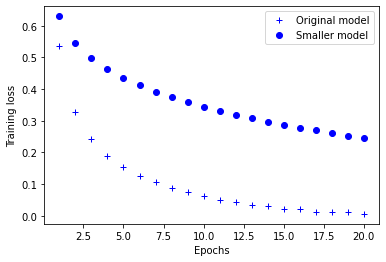

In [4]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
original_train_loss = original_hist.history['loss']
smaller_model_train_loss = smaller_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_train_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

검증데이터에 대해서는 작은 신경망에서 과적합이 더 늦게 그리고 더 완만히 진행됩니다.

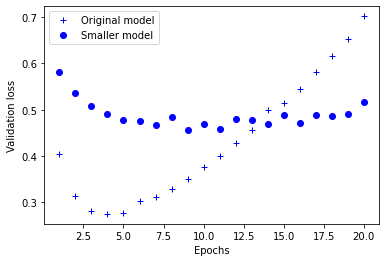

In [5]:
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 과대적합 (overfitting)

은닉층의 뉴런수를 16에서 512로 늘린 큰 신경망을 만들고 학습시켜 보겠습니다.  
![](https://drive.google.com/uc?id=1q0daZATKf8vTpHRtPelk0bcu9_CcgbLz)

In [6]:
bigger_model = keras.Sequential([
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(1, activation="sigmoid")])

bigger_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

bigger_model_hist = bigger_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5359 - accuracy: 0.7655 - val_loss: 0.3069 - val_accuracy: 0.8783
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2534 - accuracy: 0.8979 - val_loss: 0.2727 - val_accuracy: 0.8892
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1396 - accuracy: 0.9472 - val_loss: 0.3034 - val_accuracy: 0.8783
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0801 - accuracy: 0.9735 - val_loss: 0.3839 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0897 - accuracy: 0.9781 - val_loss: 0.3220 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0062 - accuracy: 0.9995 - val_loss: 0.5509 - val_accuracy: 0.8766
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 8.7530e-04 - accuracy: 0.9999 - val_loss: 0.6619 - val_accuracy: 0.8822
Epoch 8/2

큰 모델의 파라미터 개수가 중간모델의 무려 33배나 됩니다.  
기억 용량도 33배라는 뜻이지요.

In [7]:
original_model.summary()
bigger_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               5120512   
                                                                 
 dense_7 (Dense)            

훈련데이터에 대해서는 큰 신경망의 손실함수값이 빠르게 0으로 떨어집니다.  
그런데 학습 중간에 튀는 불안정한 현상을 볼수 있네요.

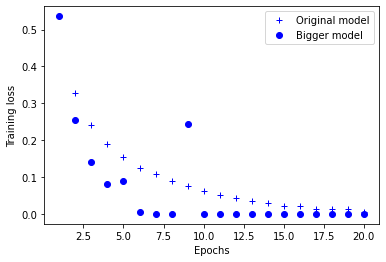

In [8]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

검증데이터에 대해서는 큰 신경망에서 과적합이 더 빨리 그리고 더 가파르게 그리고 더 불안정하게 진행됩니다.

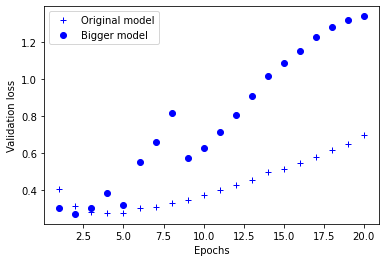

In [9]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# $L^2$-규제 ($L^2$-regularization)

[딥러닝II](https://youtu.be/7wv1sjqS5IE?t=460)에서 $L^2$-규제에 대해 공부했습니다.  
기존 손실함수에 $L^2$ 페널티 ${1 \over 2} \times \lambda \times \sum w_{i,j}^2$를 더합니다.  
여기서 $w_{i,j}$는 모든 가중치를 뜻합니다.  
가중치 감소 계수 $\lambda$는 직접 설정해야 하는 하이퍼 파라미터입니다.  
크게 잡으면 페널티가 큰 역할을 하고 작게 잡으면 페널티 역할이 작아집니다.  
미분은 선형이기 때문에 새로운 손실함수의 그레디언트는 기존 손실함수의 그레디언트와 페널티의 그레디언트를 합한 것과 같습니다.  
경사하강법을 적용하면 각 그레디언트의 반대방향의 합으로 가중치를 업데이트합니다.  
각각은 정반대 역할을 합니다.  
기존 손실함수의 그레디언트의 반대방향으로 업데이트하면 신경망은 훈련데이터의 정보를 더 담아냅니다.  
$L^2$-페널티의 그레디언트의 반대방향 업데이트는 신경망의 가중치를 비슷하게 만드려는 경향이 있습니다.  
이는 습득한 정보를 뭉게버리는 효과가 있습니다.  
케라스에서는 [tf.keras.regularizers.L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2)를 통해 구현되어 있습니다.  
[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 클래스에서 인수로 설정할 수 있습니다.

In [10]:
from tensorflow.keras import regularizers

l2_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(1, activation="sigmoid")])

l2_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

l2_model_hist = l2_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5970 - accuracy: 0.7797 - val_loss: 0.4671 - val_accuracy: 0.8637
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4032 - accuracy: 0.8935 - val_loss: 0.3904 - val_accuracy: 0.8873
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3369 - accuracy: 0.9159 - val_loss: 0.3739 - val_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3063 - accuracy: 0.9250 - val_loss: 0.3652 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2831 - accuracy: 0.9331 - val_loss: 0.3629 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2731 - accuracy: 0.9340 - val_loss: 0.3727 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2641 - accuracy: 0.9364 - val_loss: 0.3732 - val_accuracy: 0.8826
Epoch 8/20
30

$L^2$-규제된 신경망은 학습데이터의 손실함수값이 일정 수준 이하로는 내려오질 않네요.

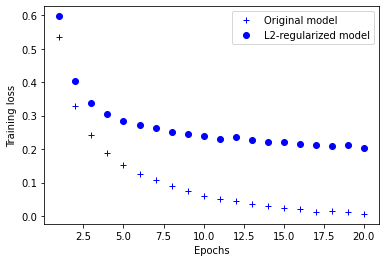

In [11]:
l2_model_loss = l2_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

$L^2$-규제된 신경망은 과적합이 억제되고 있습니다.

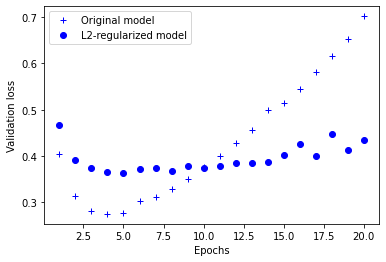

In [12]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

**[실습1] (10분) 가중치 감소 계수 $\lambda$를 약하게 $0.0002$로 잡은 모델과 강하게 $0.02$로 잡은 모델을 학습시키고 검증데이터의 손실함수 히스토리를 그래프로 그리시오.**

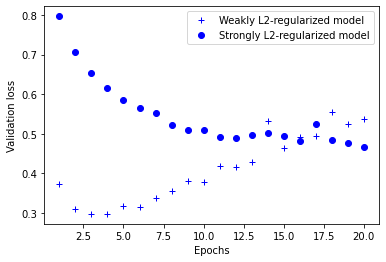

In [13]:
weak_l2_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.0002), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.0002), activation="relu"),
    Dense(1, activation="sigmoid")])

weak_l2_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

weak_l2_model_hist = weak_l2_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4, verbose=0)

weak_l2_model_val_loss = weak_l2_model_hist.history['val_loss']

strong_l2_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.02), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.02), activation="relu"),
    Dense(1, activation="sigmoid")])

strong_l2_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

strong_l2_model_hist = strong_l2_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4, verbose=0)

strong_l2_model_val_loss = strong_l2_model_hist.history['val_loss']

plt.plot(epochs, weak_l2_model_val_loss, 'b+', label='Weakly L2-regularized model')
plt.plot(epochs, strong_l2_model_val_loss, 'bo', label='Strongly L2-regularized model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# $L^1$-규제 ($L^1$-regularization)

[딥러닝II](https://youtu.be/7wv1sjqS5IE?t=1949)에서 $L^1$-규제에 대해 공부했습니다.  
기존 손실함수에 $L^1$ 페널티 ${1 \over 2} \times \lambda \times \sum |w_{i,j}|$를 더합니다.  
여기서 $w_{i,j}$는 모든 가중치를 뜻합니다.  
가중치 감소 계수 $\lambda$는 직접 설정해야 하는 하이퍼 파라미터입니다.  
크게 잡으면 페널티가 큰 역할을 하고 작게 잡으면 페널티 역할이 작아집니다.  
미분은 선형이기 때문에 새로운 손실함수의 그레디언트는 기존 손실함수의 그레디언트와 페널티의 그레디언트를 합한 것과 같습니다.  
경사하강법을 적용하면 각 그레디언트의 반대방향의 합으로 가중치를 업데이트합니다.  
각각은 정반대 역할을 합니다.  
기존 손실함수의 그레디언트의 반대방향으로 업데이트하면 신경망은 훈련데이터의 정보를 더 담아냅니다.  
$L^1$-페널티의 그레디언트의 반대방향 업데이트는 절대값이 작은 가중치를 아예 없애버리려는 경향이 있습니다.  
이는 습득한 정보를 뭉게버리는 효과가 있습니다.  
케라스에서는 [tf.keras.regularizers.L1](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1)를 통해 구현되어 있습니다.  
[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 클래스에서 인수로 설정할 수 있습니다.

In [14]:
l1_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    Dense(1, activation="sigmoid")])

l1_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

l1_model_hist = l1_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 1.0994 - accuracy: 0.7009 - val_loss: 0.7388 - val_accuracy: 0.7696
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6933 - accuracy: 0.8274 - val_loss: 0.6885 - val_accuracy: 0.8291
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6393 - accuracy: 0.8485 - val_loss: 0.6211 - val_accuracy: 0.8584
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6044 - accuracy: 0.8563 - val_loss: 0.5968 - val_accuracy: 0.8608
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5804 - accuracy: 0.8625 - val_loss: 0.5827 - val_accuracy: 0.8604
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5699 - accuracy: 0.8620 - val_loss: 0.5727 - val_accuracy: 0.8619
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5568 - accuracy: 0.8662 - val_loss: 0.5679 - val_accuracy: 0.8621
Epoch 8/20
30

**[실습2] (5분) 기본 신경망과 $L^1$-규제된 신경망의 훈련데이터에 대한 손실함수값 히스토리를 그래프로 그리시오.**

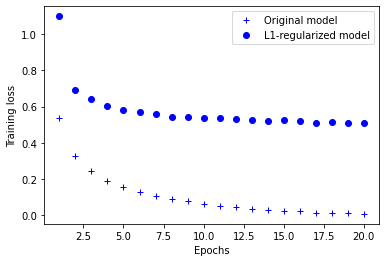

In [15]:
l1_model_loss = l1_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

**[실습3] (5분) 기본 신경망과 $L^1$-규제된 신경망의 검증데이터에 대한 손실함수값 히스토리를 그래프로 그리시오.**

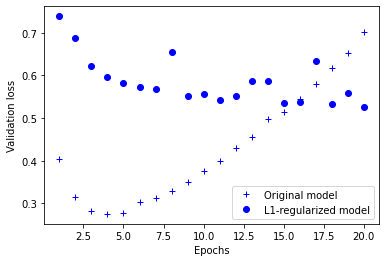

In [16]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Dropout

[딥러닝II](https://youtu.be/7wv1sjqS5IE?t=3326)에서 공부한 dropout을 케라스로 구현하겠습니다.  
dropout은 학습 데이터가 들어올때마다 무작위로 뉴런을 삭제해서 신호전달을 차단하는 기법입니다.  
이상해보이지만 과적합 억제를 위해 매우 많이 사용되는 기법입니다.  
케라스에는 [Dropout층](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)이 구현되어 있습니다.  
몇 퍼센트를 삭제할지 인수로 지정해 줍니다.  
![](https://drive.google.com/uc?id=1wPtyMrgWXGxiJp0YofJPGlYDDE94uoX-)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.6392 - accuracy: 0.6299 - val_loss: 0.5550 - val_accuracy: 0.8005
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5264 - accuracy: 0.7562 - val_loss: 0.4322 - val_accuracy: 0.8700
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4472 - accuracy: 0.8178 - val_loss: 0.3710 - val_accuracy: 0.8721
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3831 - accuracy: 0.8552 - val_loss: 0.3359 - val_accuracy: 0.8734
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3306 - accuracy: 0.8819 - val_loss: 0.2923 - val_accuracy: 0.8916
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2865 - accuracy: 0.9020 - val_loss: 0.2794 - val_accuracy: 0.8908
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2507 - accuracy: 0.9149 - val_loss: 0.2863 - val_accuracy: 0.8921
Epoch 8/20
30

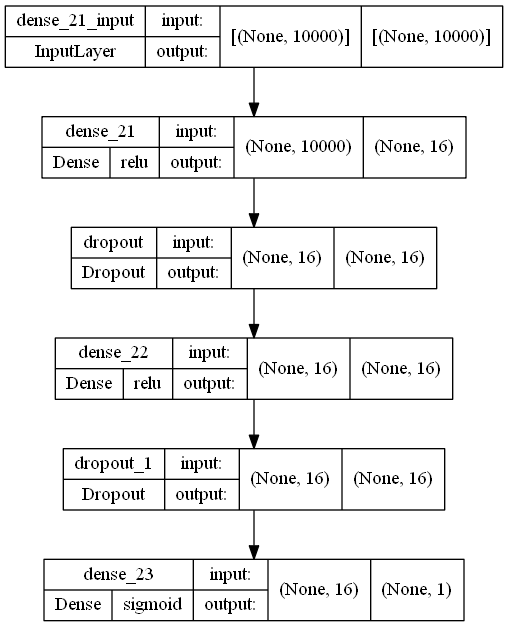

In [17]:
from tensorflow.keras.utils import plot_model
from keras.layers import Dropout

dropout_model = keras.Sequential([
    Dense(16, input_shape=(10000,), activation="relu"),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")])

dropout_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

dropout_model_hist = dropout_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

plot_model(dropout_model, show_shapes=True, show_layer_activations=True)

dropout층이 추가된 신경망은 학습데이터의 손실함수값이 천천히 떨어지네요.

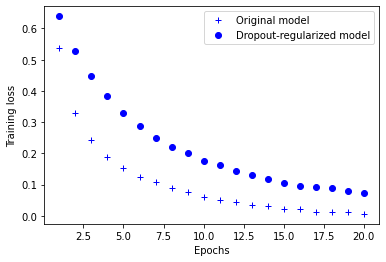

In [18]:
dropout_model_loss = dropout_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

dropout층이 추가된 신경망은 과적합이 늦게 시작되고 더 완만하게 진행됩니다.

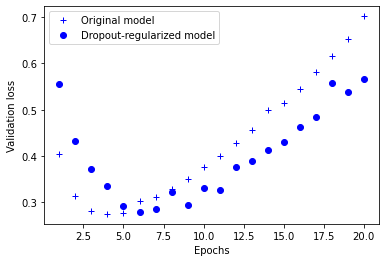

In [19]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

**[실습4] (10분) dropout 비율을 약하게 $0.2$로 잡은 모델과 강하게 $0.8$로 잡은 모델을 학습시키고 검증데이터의 손실함수 히스토리를 그래프로 그리시오.**

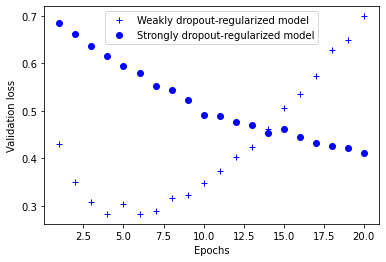

In [20]:
weak_dropout_model = keras.Sequential([
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")])

weak_dropout_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

weak_dropout_model_hist = weak_dropout_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4, verbose=0)

strong_dropout_model = keras.Sequential([
    Dense(16, activation="relu"),
    Dropout(0.8),
    Dense(16, activation="relu"),
    Dropout(0.8),
    Dense(1, activation="sigmoid")])

strong_dropout_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

strong_dropout_model_hist = strong_dropout_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4, verbose=0)

weak_dropout_model_val_loss = weak_dropout_model_hist.history['val_loss']
strong_dropout_model_val_loss = strong_dropout_model_hist.history['val_loss']

plt.plot(epochs, weak_dropout_model_val_loss, 'b+', label='Weakly dropout-regularized model')
plt.plot(epochs, strong_dropout_model_val_loss, 'bo', label='Strongly dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()